In [17]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd

In [18]:
class Timer:
    def __init__(self, msg='Time elapsed'):
        self.msg = msg
    def __enter__(self):
        self.start = time.time()
        return self
    def __exit__(self, *args):
        self.end = time.time()
        duration = self.end - self.start
        print(f'{self.msg}: {duration:.2f}s')#.format(self.end - self.start))

In [19]:
class Event:
    __slots__ = 't', 'x', 'y', 'p'
    def __init__(self, t, x, y, p):
        self.t = t
        self.x = x
        self.y = y
        self.p = p
    def __repr__(self):
        return f'Event(t={self.t:.3f}, x={self.x}, y={self.y}, p={self.p})'

In [ ]:
 header = pd.read_csv(path_to_events, delim_whitespace=True, header=None, names=['width', 'height'],
                         dtype={'width': np.int, 'height': np.int},
                         nrows=1)
    width, height = header.values[0]


In [29]:
with Timer('Loading'):
    path_to_events = 'data/boxes_6dof/events.zip'
    header = pd.read_csv(path_to_events, delim_whitespace=True, names=['width', 'height'],
                         dtype={'width': np.int, 'height': np.int}, nrows=1)
    width, height = header.values[0]
    print(f'width, height: {width}, {height}')
    event_array = pd.read_csv(path_to_events, delim_whitespace=True, header=None,
                              names=['t', 'x', 'y', 'pol'],
                              dtype={'t': np.float64, 'x': np.int16, 'y': np.int16, 'pol': np.int16},
                              engine='c',
                              skiprows=1, memory_map=True)
    print(event_array)
#     event_array = np.random.rand(1000000, 4)
#     event_array = event_array[event_array[:, 0].argsort()]
#     event_array[:, 1:3] = np.floor(event_array[:, 1:3]*10)
#     print(event_array[:5,:])

width, height: 240, 180
                    t    x    y  pol
0        1.468941e+09  128  154    1
1        1.468941e+09  102   26    0
2        1.468941e+09  154   85    0
3        1.468941e+09   99   26    0
4        1.468941e+09   73   52    0
...               ...  ...  ...  ...
3448292  1.468941e+09  147   81    0
3448293  1.468941e+09   73   82    1
3448294  1.468941e+09   40   90    0
3448295  1.468941e+09  197   90    1
3448296  1.468941e+09  232  162    0

[3448297 rows x 4 columns]
Loading: 1.16s


In [28]:
with Timer('Converting'):
    event_list = []
    for event in event_array:
        t, x, y, p = event
        event_list.append(Event(t, int(x), int(y), -1 if p < 0.5 else 1))
    for e in event_list[:5]:
        print(e)

Converting: 0.10s


ValueError: not enough values to unpack (expected 4, got 1)

In [13]:
with Timer('Reconstruction'):
    image_state = np.zeros((10, 10), dtype=np.float32)
    for e in event_list:
        image_state[e.y, e.x] += e.p

Reconstruction: 2.65s


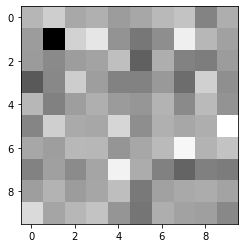

In [14]:
plt.imshow(image_state, cmap='gray')
plt.show()